Fundamentos de Data Science
Analizando la Rotación de Clientes en Telecomunicaciones

Requisitos:

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Limpieza de datos con Python:
Identificar y solucionar cualquier valor duplicado.

In [3]:
# Encuentra filas duplicadas (considerando todas las columnas)
duplicates = data[data.duplicated()]

# Muestra las filas duplicadas
print(duplicates)

# Cuenta el número de filas duplicadas
num_duplicates = duplicates.shape[0]
print(f"Número de filas duplicadas: {num_duplicates}")

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Número de filas duplicadas: 0


Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.


In [5]:
# Imprime los tipos de datos de cada columna
print(data.dtypes)



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [9]:
#Se convirtio la columna TotalCharges del tipo OBJECT al tipo Float64
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data.dtypes)




customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [10]:
unique_values = data['gender'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['Female' 'Male']


In [11]:
unique_values = data['SeniorCitizen'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

[0 1]


In [12]:
unique_values = data['Partner'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['Yes' 'No']


In [13]:
unique_values = data['Dependents'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['No' 'Yes']


In [14]:
#PaymentMethod
unique_values = data['PaymentMethod'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
#MonthlyCharge
unique_values = data['MonthlyCharges'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


In [19]:
#Contract
unique_values = data['Contract'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['Month-to-month' 'One year' 'Two year']


In [20]:
#PaperlessBilling
unique_values = data['PaperlessBilling'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['Yes' 'No']


In [21]:
#PhoneService
unique_values = data['PhoneService'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['No' 'Yes']


In [22]:
#MultipleLines
unique_values = data['MultipleLines'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['No phone service' 'No' 'Yes']


In [23]:
#InternetService
unique_values = data['InternetService'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['DSL' 'Fiber optic' 'No']


In [24]:
#OnlineSecurity
unique_values = data['OnlineSecurity'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['No' 'Yes' 'No internet service']


In [25]:
#OnlineBackup
unique_values = data['OnlineBackup'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['Yes' 'No' 'No internet service']


In [26]:
#DeviceProtection
unique_values = data['DeviceProtection'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['No' 'Yes' 'No internet service']


In [27]:
#TechSupport
unique_values = data['TechSupport'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['No' 'Yes' 'No internet service']


In [28]:
#StreamingTV
unique_values = data['StreamingTV'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos


['No' 'Yes' 'No internet service']


In [29]:
#StreamingMovies
unique_values = data['StreamingMovies'].unique()
print(unique_values)

#buscqueda de inconsistencias de datos

['No' 'Yes' 'No internet service']


Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [16]:
# Valores faltantes en cada columna
missing_values = data.isnull().sum()
print(missing_values)

# Mostrar las filas con valores faltantes
rows_with_missing = data[data.isnull().any(axis=1)]
print(rows_with_missing)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVO

Se procedera a reemplazar las 11 filas que tienen datos NaN con un 0 (cero) debido a que es producto de un calculo que no sabemos como se realizar. Esto debe ser consultado con el cliente para reemplazarlo con los datos correctos mas adelante.

In [17]:
# Se reemplaza por la constante 0 Cero.
data['TotalCharges'] = data['TotalCharges'].fillna(0)

#otros tipos de relleno o cambio
#Mean
#data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

#median
#data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [18]:
# Valores faltantes en cada columna despues del rellenado
missing_values = data.isnull().sum()
print(missing_values)

# Mostrar las filas con valores faltantes
rows_with_missing = data[data.isnull().any(axis=1)]
print(rows_with_missing)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

**En el punto de verificacion anteriores no se han encontrado datos inconsistentes ademas de los nulos en TotalCharges.**



Exploración de datos con Python:

Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


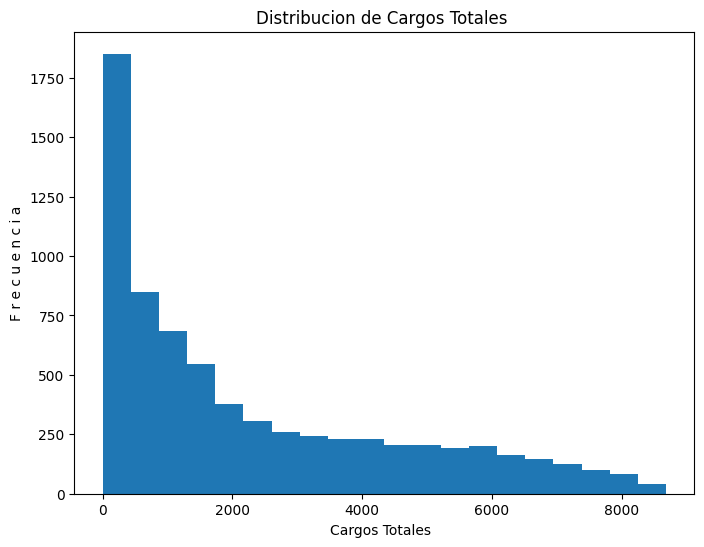

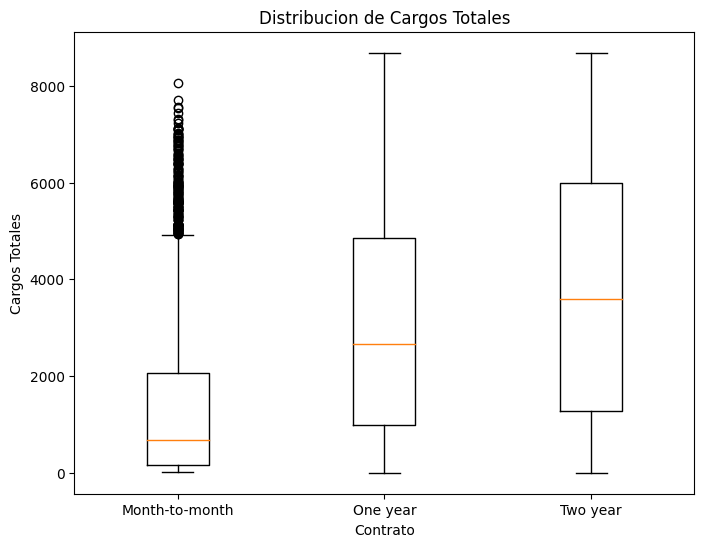

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Histograma para la columna 'TotalCharges'
#
plt.figure(figsize=(8, 6))
plt.hist(data['TotalCharges'], bins=20)
plt.title('Distribucion de Cargos Totales ')
plt.xlabel('Cargos Totales  ')
plt.ylabel('F r e c u e n c i a')
plt.show()
# Interpretación: Mas abajo


#Box plot para la columna 'TotalCharges' por 'Contract'
TotalCharges_by_contract = [data['TotalCharges'][data['Contract'] == level] for level in data['Contract'].unique()]
plt.figure(figsize=(8, 6))
plt.boxplot(TotalCharges_by_contract, labels=data['Contract'].unique())
plt.title('Distribucion de Cargos Totales')
plt.xlabel('Contrato')
plt.ylabel('Cargos Totales')
plt.show()
# Interpretación:  Mas abajo del grafico


En el primer grafico de barras se puede observar que la concentracion del Cargo Total esta por debajo de los 2.000 U$S.

En el Grafico de BOX
Que la Frecuencia Mensual es la mas utilizada por nuestros clientes.

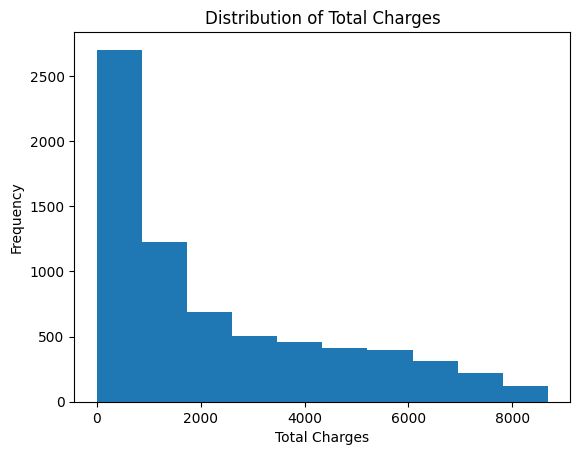

In [34]:
import matplotlib.pyplot as plt
plt.hist(data['TotalCharges'], bins=10)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

"""
Interpretacion;
a) La mayoria de los clientes tienen cargos totales alrededor de $2.000
b) Existen muy pocos clientes con muy bajo cargos totales.
c) Existen una larga lista de clientes con elevado cargos totales que nos
pensar en un alto valor del Cliente.
""

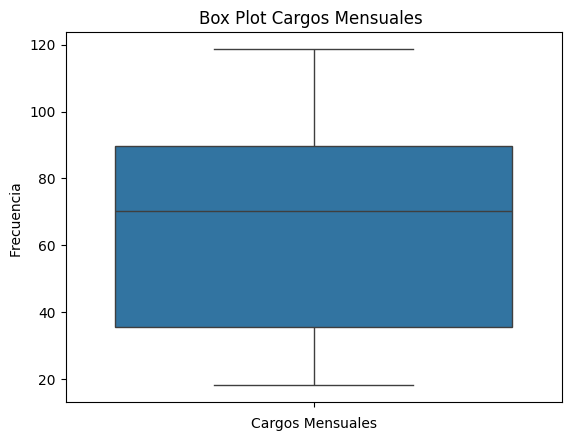

In [43]:
import seaborn as sns
sns.boxplot(y=data['MonthlyCharges'])
plt.title('Box Plot Cargos Mensuales ')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia ')
plt.show()

#Interpretacion.
# La mayoria de los clientes son de cargos mensuales.
# Indica que debemos cuidarlos muy bien. Alto Valor de Cliente.

Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

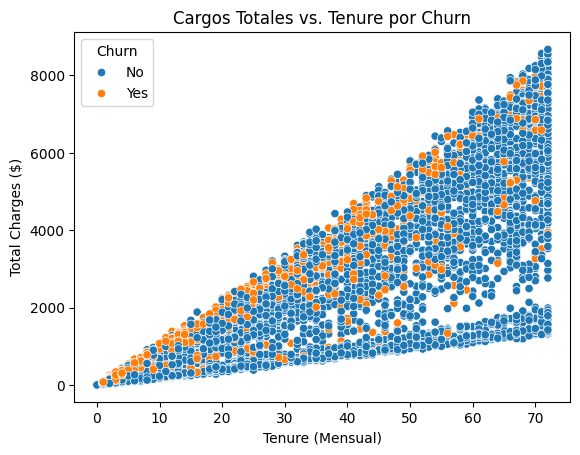

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot de  TotalCharges vs. Tenure, coloredo por churn
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=data)
plt.title('Cargos Totales vs. Tenure por Churn')
plt.xlabel('Tenure (Mensual)')
plt.ylabel('Total Charges ($)')
plt.show()

# Interpretacion;
# Este grafico Plot nos muestra la reacion entre el Cliente Tenure y el Crgo Total,
# Con los puntos de color por el cliente Churn. Podemos observar que el cliente
# con el mas largo Tenure tiende a tener cargos totales superiores, que es de esperarse.
# Adicionalmente el Cliente Churn paraece concentrarse dentro de los tiempos cortos
# de tenure y bajo cargos totales.


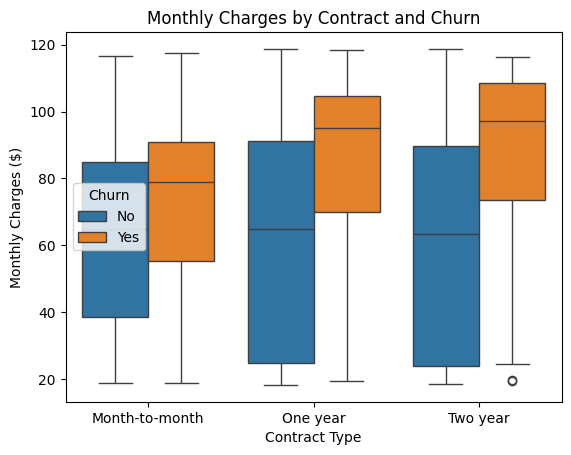

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot de MonthlyCharges por Contract y Churn
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=data)
plt.title('CARGOS Mensuales por Contratos y Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cargos Mensuales ($)')
plt.show()

# Interpretation:
# This box plot compares the distribution of monthly charges for different contract
# types and churn status. We can see that customers with month-to-month contracts
# tend to have higher monthly charges and a higher churn rate compared to those
# with one- or two-year contracts. This suggests that contract type is a significant
# factor in both monthly charges and churn behavior.

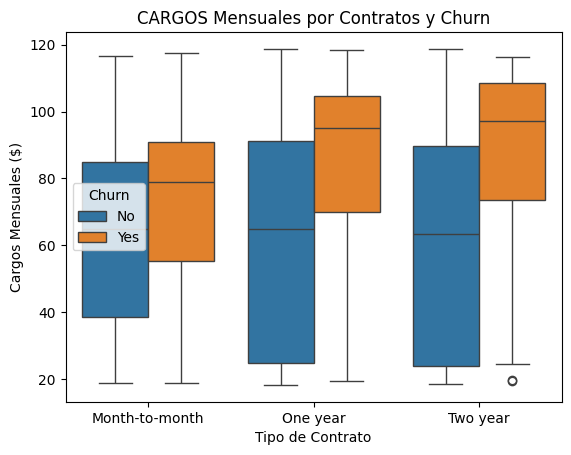

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot de MonthlyCharges por Contract y Churn
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=data)
plt.title('CARGOS Mensuales por Contratos y Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cargos Mensuales ($)')
plt.show()

# Interpretacion;
# Este grafico de BOX Plot compara la distribucion del cargo mensual para
# diferentes tipos de contratos y statu churn.
# Podemos ver que el cliente con contrato mensual  tiende a tener su cargo mensual elevado.
# y su alto promedio churn comparado con los que tienen 1 o 2 años de contrato.
# Esto sugiere que el tipo de contrato es un factor significativo en ambos el cargo mensual
# y el comportamiento del churn.
